In [1]:
import numpy as np 
import glob ,os
from sklearn.mixture import GaussianMixture 
import matplotlib.pyplot as plt
import pandas as pd 
from sklearn.impute import KNNImputer
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import normalize

/home/shorouk/Desktop/file/data/data_449.csv
Vect shape : (98, 1)
[[ 1.30445373e+13  2.99467594e+00  3.07579539e+00  8.38464710e+00
  -2.00242316e-02  7.87242051e-02  5.93550506e-02  0.00000000e+00]
 [ 1.30445569e+13  3.39820452e+00  3.44614024e+00  8.81791125e+00
  -3.86658160e-02 -2.94094246e-04 -8.58005506e-03  0.00000000e+00]
 [ 1.30445766e+13  2.31499480e+00  2.80152706e+00  9.42375664e+00
   7.54556239e-03 -8.10575562e-02 -2.17864188e-02  0.00000000e+00]
 [ 1.30445963e+13  2.10295718e+00  2.77474092e+00  9.34542899e+00
   3.49697323e-02 -6.52319134e-02 -3.55542520e-02  0.00000000e+00]
 [ 1.30446158e+13  2.66080548e+00  3.40894020e+00  9.19457560e+00
   8.95576787e-02 -8.14233010e-02  2.66229775e-02  0.00000000e+00]
 [ 1.30446355e+13  3.15124682e+00  3.47899895e+00  9.56875634e+00
   8.58704631e-02 -5.91869381e-02  1.44533285e-02  0.00000000e+00]
 [ 1.30446551e+13  3.74122356e+00  3.70128124e+00  1.01261240e+01
   2.15964992e-02  7.81132119e-03  3.42007263e-02  0.00000000e+00]
 [ 

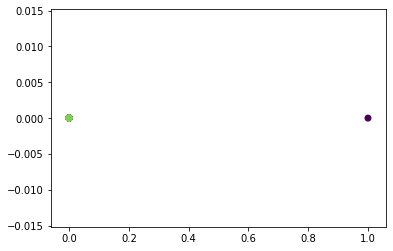

In [2]:
Arra = np.empty((1,8))
i = 0
folder_path = '/home/shorouk/Desktop/file/data'
for filename in glob.glob(os.path.join(folder_path, '*.csv')):
    with open(filename, 'r') as f:
        text = f.read()
        print (filename)
        Data = np.genfromtxt(filename,delimiter = ',')
        Data = Data[1:]
        Vec = np.ones((Data.shape[0],1))*i
        print ("Vect shape :", Vec.shape)
        i = i + 1
        Data = np.hstack((Data,Vec))
        print (Data)
        print(Data.shape)
        Arra = np.concatenate((Data, Arra), axis = 0)
    

# impute the missing elements NaN values    
imp = KNNImputer(n_neighbors=2, weights="uniform")
m = imp.fit(Arra)
Arra = m.transform (Arra)
Arra= normalize(Arra,norm='l2')
np.random.shuffle(Arra)

Arr_d = Arra [:, [0,1,2,3,4,5,6]]

pca = PCA(n_components = 2).fit(Arr_d)
pca_2d = pca.transform(Arr_d)

plt.figure('Reference Plot')
plt.scatter(pca_2d[:, 0], pca_2d[:, 1], c= Arra[:,7])

        

In [3]:
from sklearn.cluster import KMeans
from sklearn import metrics
from scipy.spatial.distance import cdist

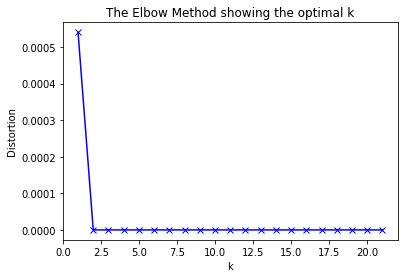

In [4]:
# k means determine k
distortions = []
n = range(1,22)
for i in n:
    kmeanModel = KMeans(n_clusters=i, random_state = 0).fit(pca_2d)
    kmeanModel.fit(pca_2d)
    distortions.append(sum(np.min(cdist(pca_2d, kmeanModel.cluster_centers_, 'euclidean'), axis=1)) / pca_2d.shape[0])

# Plot the elbow
plt.plot(n, distortions, 'bx-', )
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()


In [5]:
kmeans = KMeans(n_clusters=2, random_state = 0).fit(pca_2d)

[0 0 0 ... 0 0 0]


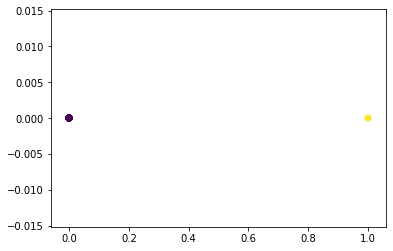

In [6]:
#Kmeans Model
K = kmeans.transform(pca_2d)
plt.scatter(pca_2d[:,0], pca_2d[:,1], c = kmeans.labels_)
print (kmeans.labels_)
plt.show()

(3701,)
(3701, 8)


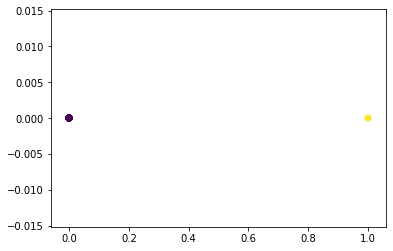

[0 0 0 ... 0 0 0]
(3701,)


In [7]:
#GaussianMixture
model = GaussianMixture (6).fit(Arr_d)
L = model.predict(Arr_d)
print(L.shape)
df = pd.DataFrame(Arra)
print(df.shape)
plt.scatter(pca_2d[:,0], pca_2d[:,1], c = L)
plt.show()
print (L)
print(L.shape)

In [23]:
L = L.reshape(3701,1)
print (L.shape)
print(Arra.shape)
Arra_ =np.hstack((Arra,L))
Arra_ = Arra_ [:, [7,8]]
df_ = np.empty((22,2))
df = pd.DataFrame(data=Arra_,  columns=["file", "cluster"])
for i in range (22):
    df_[i,1]= (df[df["file"]==i]["cluster"]).median()
    print(df[df["file"]==i]["cluster"].median())
    df_ [i,0]=i
    
m = imp.fit(df_)
df_ = m.transform (df_)
print(df_)
df_l = pd.DataFrame(data=df_,  columns=["file", "cluster"])
i =0
for filename in glob.glob(os.path.join(folder_path, '*.csv')):
    df_l["file"] = df_l["file"].replace({i:filename})
    i = i+1
print (df_l)
df_l["file"] = df_l["file"].str.replace('/home/shorouk/Desktop/file/data/',"")
print (df_l)
df_l.reset_index(drop=True)
df_l.to_csv("Result_1.csv")

(3701, 1)
(3701, 8)
0.0
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
[[ 0.  0.]
 [ 1.  0.]
 [ 2.  0.]
 [ 3.  0.]
 [ 4.  0.]
 [ 5.  0.]
 [ 6.  0.]
 [ 7.  0.]
 [ 8.  0.]
 [ 9.  0.]
 [10.  0.]
 [11.  0.]
 [12.  0.]
 [13.  0.]
 [14.  0.]
 [15.  0.]
 [16.  0.]
 [17.  0.]
 [18.  0.]
 [19.  0.]
 [20.  0.]
 [21.  0.]]
                                            file  cluster
0   /home/shorouk/Desktop/file/data/data_449.csv      0.0
1   /home/shorouk/Desktop/file/data/data_788.csv      0.0
2   /home/shorouk/Desktop/file/data/data_668.csv      0.0
3   /home/shorouk/Desktop/file/data/data_729.csv      0.0
4   /home/shorouk/Desktop/file/data/data_545.csv      0.0
5   /home/shorouk/Desktop/file/data/data_997.csv      0.0
6   /home/shorouk/Desktop/file/data/data_825.csv      0.0
7   /home/shorouk/Desktop/file/data/data_562.csv      0.0
8    /home/shorouk/Desktop/file/data/data_17.csv      0.0
9   /home/shorouk/Desktop/file/data/data_344.csv      0.0
10  /home/s